# Predictions statistics

Let's analyse the predictions made on our test datasplit.

**Note** To run this notebook you previously have to run and save the predictions on a test dataset **with ground-truth labels**. See the Datasplit section in [3.0 notebook](./3.0-Computing_predictions.ipynb#Predicting-a-datasplit-txt-file) for reference.


In [5]:
import os
import json
import numpy as np

from imgclas.data_utils import load_image
from imgclas import paths, plot_utils

import warnings
warnings.filterwarnings("ignore") # To ignore UndefinedMetricWarning: [Recall/Precision/F-Score] is ill-defined and being set to 0.0 in labels with no [true/predicted] samples.

# User parameters to set
TIMESTAMP = '2022-09-20_OnlyCuasi'           # timestamp of the model
# SPLIT_NAME = 'testLaRiojaICVVCopasAll'                   # dataset split to predict
SPLIT_NAME = 'train'
MODEL_NAME = 'final_model.h5'         # model to use to make the mediction

# Set the timestamp
paths.timestamp = TIMESTAMP

# Load back the predictions
pred_path = os.path.join(paths.get_predictions_dir(), '{}+{}.json'.format(MODEL_NAME, SPLIT_NAME))
with open(pred_path) as f:
    pred_dict = json.load(f)

## Computing the metrics

Check [sklearn](https://scikit-learn.org/stable/modules/classes.html#classification-metrics) for more classification metrics.

In [6]:
from imgclas import test_utils
import sklearn.metrics as metrics
# https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b

y, yhat = np.array(pred_dict['true_value']), np.array(pred_dict['pred_value'])

mae = metrics.mean_absolute_error(y, yhat)
mse = metrics.mean_squared_error(y, yhat)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y,yhat)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

MAE: 3.7601078914076362
MSE: 23.98202577207136
RMSE: 4.897144655007789
R-Squared: 0.9892947090662519


## Computing the confusion matrix

In [3]:
'''
Round a list of numbers to the closer 25th (i.e. 0, 25, 50, 75, etc.)

It is important to note that x.5 will be rounded to x instead of x+1 in the current 3.6.8 Python version.
For more details see https://stackoverflow.com/questions/10825926/python-3-x-rounding-behavior
'''

def myround_list(x, base=25):
    y=[]
    for i in x:
        y.append(round(base * round(float(i)/base)))
    return y

In [4]:
import matplotlib.pylab as plt
import seaborn
from sklearn.metrics import confusion_matrix


def plt_conf_matrix(conf_mat,  name, labels=False):
    
    fig = plt.figure(figsize=(20, 20))
    hm = seaborn.heatmap(conf_mat, annot=True, square=True, cbar_kws={'fraction':0.046, 'pad':0.04},
                         xticklabels=labels, yticklabels=labels, cmap=plt.cm.Blues, fmt=".2f")
    fontsize = None
    hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=90, ha='right', fontsize=fontsize)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.savefig('/srv/image-results/'+name+'_confussionMatrix.jpg')

### Standard confusion matrix

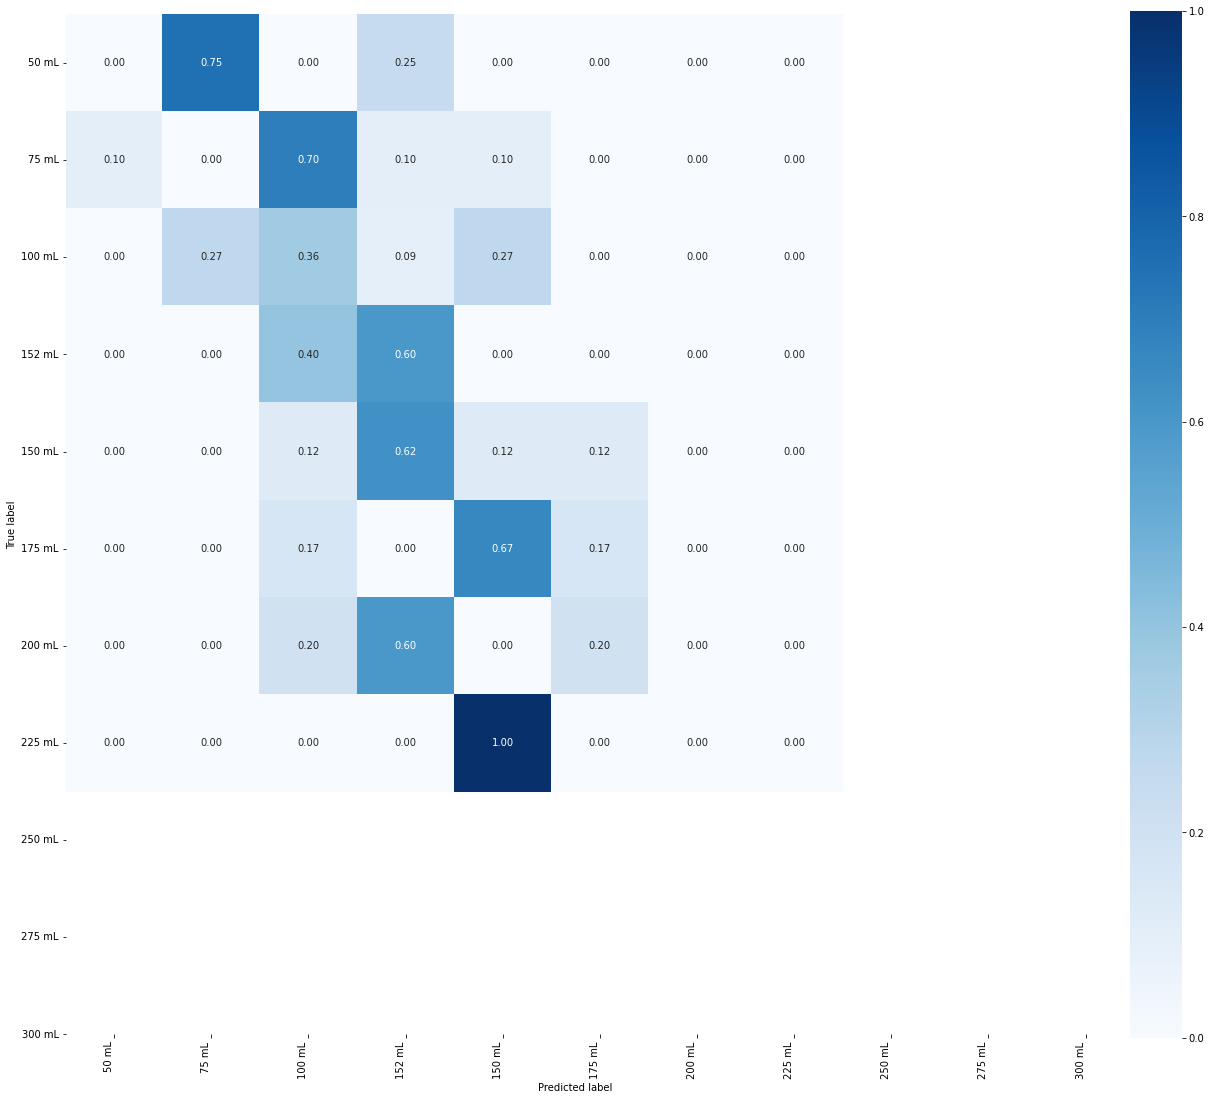

In [21]:
y_true, y_pred = np.array(pred_dict['true_value']), np.array(myround_list(pred_dict['pred_value']))
conf_mat = confusion_matrix(y_true, y_pred, sample_weight=None)
normed_conf = conf_mat / np.sum(conf_mat, axis=1)[:, np.newaxis]

# plt_conf_matrix(conf_mat)
plt_conf_matrix(normed_conf, labels=["50 mL", "75 mL", "100 mL", "152 mL", "150 mL",
                                    "175 mL", "200 mL", "225 mL", "250 mL", "275 mL",
                                    "300 mL"], name='Madrid_copasAll')

## Volunteers' images

In [15]:
import os
import json
import numpy as np

from imgclas.data_utils import load_image
from imgclas import paths, plot_utils

import warnings
warnings.filterwarnings("ignore") # To ignore UndefinedMetricWarning: [Recall/Precision/F-Score] is ill-defined and being set to 0.0 in labels with no [true/predicted] samples.

# User parameters to set
TIMESTAMP = '2021-10-26_Lab_All_Copas_All_reg'           # timestamp of the model
# SPLIT_NAME = 'testLaRiojaICVVCopasAll'                   # dataset split to predict
SPLIT_NAME = 'copasVoluntarios'
MODEL_NAME = 'final_model.h5'         # model to use to make the mediction

# Set the timestamp
paths.timestamp = TIMESTAMP

# Load back the predictions
pred_path = os.path.join(paths.get_predictions_dir(), '{}+{}.json'.format(MODEL_NAME, SPLIT_NAME))
with open(pred_path) as f:
    pred_dict = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '/srv/image-classification-tf/models/2021-10-26_Lab_All_Copas_All_reg/predictions/final_model.h5+copasVoluntarios.json'

## Computing the metrics

Check [sklearn](https://scikit-learn.org/stable/modules/classes.html#classification-metrics) for more classification metrics.

In [16]:
from imgclas import test_utils
import sklearn.metrics as metrics
# https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b

y, yhat = np.array(pred_dict['true_value']), np.array(pred_dict['pred_value'])

mae = metrics.mean_absolute_error(y, yhat)
mse = metrics.mean_squared_error(y, yhat)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y,yhat)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

MAE: 32.51773536682129
MSE: 1700.517880939724
RMSE: 41.23733600682425
R-Squared: 0.31952065588646494


## Computing the confusion matrix

In [17]:
'''
Round a list of numbers to the closer 25th (i.e. 0, 25, 50, 75, etc.)

It is important to note that x.5 will be rounded to x instead of x+1 in the current 3.6.8 Python version.
For more details see https://stackoverflow.com/questions/10825926/python-3-x-rounding-behavior
'''

def myround_list(x, base=25):
    y=[]
    for i in x:
        y.append(round(base * round(float(i)/base)))
    return y

In [18]:
import matplotlib.pylab as plt
import seaborn
from sklearn.metrics import confusion_matrix


def plt_conf_matrix(conf_mat,  name, labels=False):
    
    fig = plt.figure(figsize=(20, 20))
    hm = seaborn.heatmap(conf_mat, annot=True, square=True, cbar_kws={'fraction':0.046, 'pad':0.04},
                         xticklabels=labels, yticklabels=labels, cmap=plt.cm.Blues, fmt=".2f")
    fontsize = None
    hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=90, ha='right', fontsize=fontsize)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#     plt.savefig('/srv/image-results/'+name+'_confussionMatrix.jpg')

### Standard confusion matrix

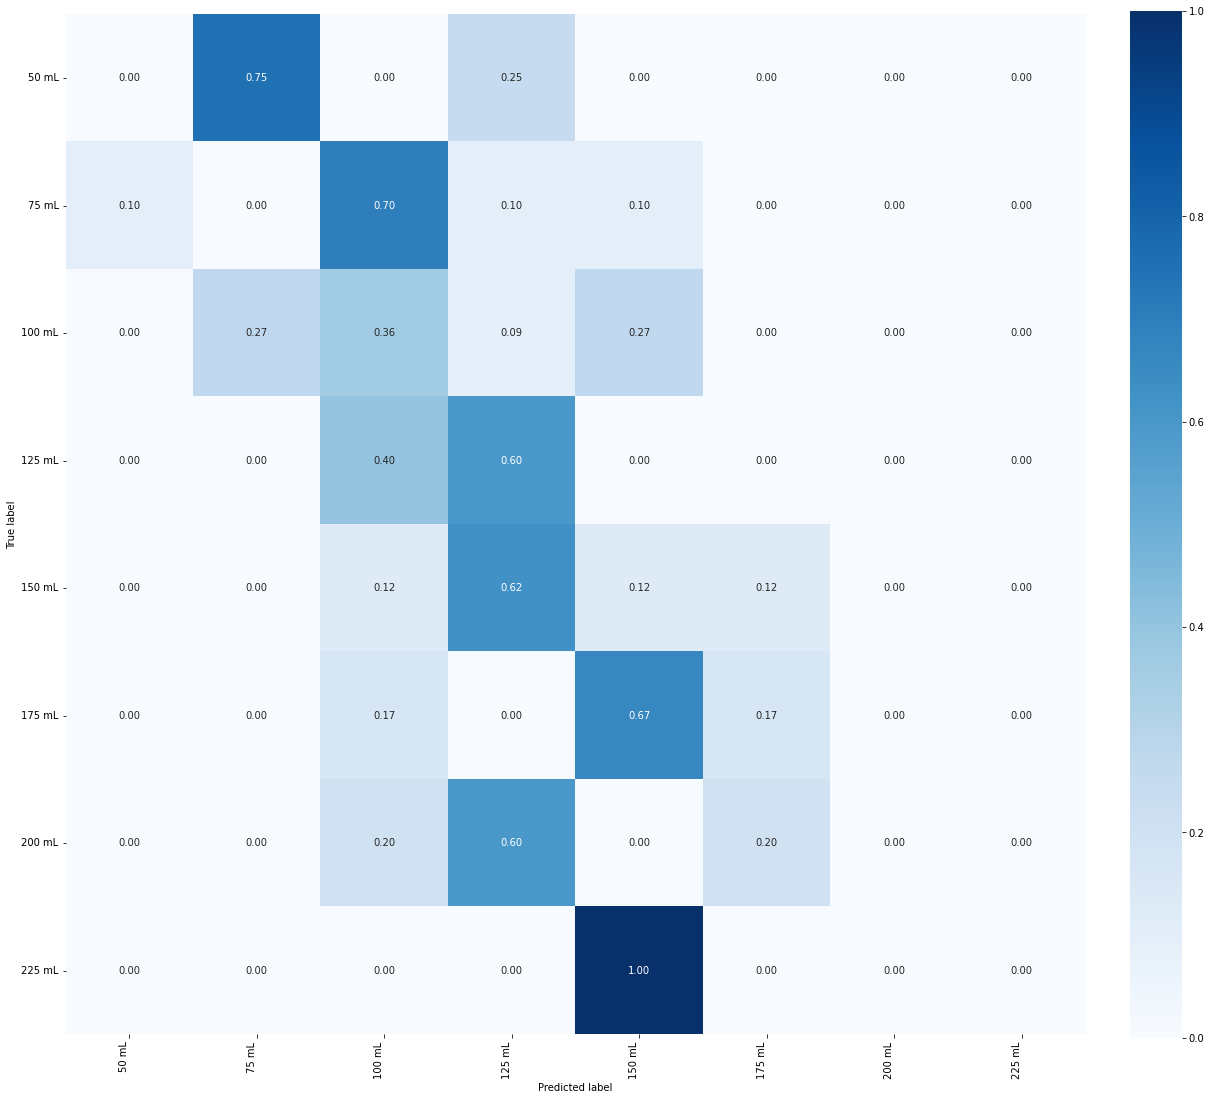

In [32]:
y_true, y_pred = np.array(pred_dict['true_value']), np.array(myround_list(pred_dict['pred_value']))
conf_mat = confusion_matrix(y_true, y_pred, sample_weight=None)
normed_conf = conf_mat / np.sum(conf_mat, axis=1)[:, np.newaxis]

# plt_conf_matrix(conf_mat)

plt_conf_matrix(normed_conf, labels=["50 mL", "75 mL", "100 mL", "125 mL", "150 mL",
                                    "175 mL", "200 mL", "225 mL"], name='ModeloBatch8SinDataAugmentation')
# plt_conf_matrix(normed_conf, labels=["50 mL", "75 mL", "100 mL", "125 mL", "150 mL",
#                                     "175 mL", "200 mL", "225 mL", "250 mL", "275 mL",
#                                     "300 mL"], name='Madrid_copasAll')

In [5]:
'''
Round a number to the closer 25th (i.e. 0, 25, 50, 75, etc.)

It is important to note that x.5 will be rounded to x instead of x+1 in the current 3.6.8 Python version.
For more details see https://stackoverflow.com/questions/10825926/python-3-x-rounding-behavior
'''

def myround(x, base=25):
    return round(base * round(float(x)/base))

In [6]:
# save images that are wrong predicted in a list,
# to see if they share a pattern
right_predictions=[]
for i in range(len(pred_dict['true_value'])):
    if myround(pred_dict['pred_value'][i])==pred_dict['true_value'][i]:
        right_predictions.append(pred_dict['filenames'][i])

In [7]:
# save images that are wrong predicted in a list,
# to see if they share a pattern
wrong_predictions=[]
for i in range(len(pred_dict['true_value'])):
    if myround(pred_dict['pred_value'][i])!=pred_dict['true_value'][i]:
        wrong_predictions.append(pred_dict['filenames'][i])

In [9]:
wrong_predictions

['/srv/data/allVoluntarios/test/9a4bbc89-d0e6-4a7c-98af-2e588d9ae21b_otra_joven_100_pinta_fuera_19-06-2021_11-16-02.jpg',
 '/srv/data/allVoluntarios/test/148764ca-c6cb-46cd-8295-36c4880d1c25_madrid_crianza_100_copa_burd_almuerzo_18-03-2022_14-37-22.jpg',
 '/srv/data/allVoluntarios/test/86788afc-488e-4030-98d3-e28a52f43919_otra_joven_75_copa_borg_almuerzo_04-03-2022_14-29-55.jpg',
 '/srv/data/allVoluntarios/test/8ec17b0f-b668-49d7-8d6e-9799c5601a30_otra_crianza_50_copa_borg_almuerzo_02-06-2021_13-32-47.jpg',
 '/srv/data/allVoluntarios/test/10d528b5-9f02-4820-85fe-62db3bf2d031_madrid_joven_125_duralex_cena_31-05-2021_19-45-40.jpg',
 '/srv/data/allVoluntarios/test/ffa31c45-f069-4af1-a195-ab900644e81d_madrid_crianza_175_copa_burd_almuerzo_26-11-2021_14-25-30.jpg',
 '/srv/data/allVoluntarios/test/148764ca-c6cb-46cd-8295-36c4880d1c25_madrid_reserva_100_copa_burd_cena_21-03-2022_20-00-35.jpg',
 '/srv/data/allVoluntarios/test/c0ffe414-5112-4a3b-be1b-26df67e4c930_madrid_joven_125_copa_borg_almu

In [8]:
len(wrong_predictions)

65

In [10]:
len(wrong_predictions) # hay 81 fotos de voluntarios, solo predice correctamente 10

41

In [11]:
wrong_predictions

['/srv/data/allVoluntarios/test/9a4bbc89-d0e6-4a7c-98af-2e588d9ae21b_otra_joven_100_pinta_fuera_19-06-2021_11-16-02.jpg',
 '/srv/data/allVoluntarios/test/148764ca-c6cb-46cd-8295-36c4880d1c25_madrid_crianza_100_copa_burd_almuerzo_18-03-2022_14-37-22.jpg',
 '/srv/data/allVoluntarios/test/86788afc-488e-4030-98d3-e28a52f43919_otra_joven_75_copa_borg_almuerzo_04-03-2022_14-29-55.jpg',
 '/srv/data/allVoluntarios/test/8ec17b0f-b668-49d7-8d6e-9799c5601a30_otra_crianza_50_copa_borg_almuerzo_02-06-2021_13-32-47.jpg',
 '/srv/data/allVoluntarios/test/ffa31c45-f069-4af1-a195-ab900644e81d_madrid_crianza_175_copa_burd_almuerzo_26-11-2021_14-25-30.jpg',
 '/srv/data/allVoluntarios/test/148764ca-c6cb-46cd-8295-36c4880d1c25_madrid_reserva_100_copa_burd_cena_21-03-2022_20-00-35.jpg',
 '/srv/data/allVoluntarios/test/c0ffe414-5112-4a3b-be1b-26df67e4c930_madrid_joven_125_copa_borg_almuerzo_20-11-2021_13-42-29.jpg',
 '/srv/data/allVoluntarios/test/0a3fcef2-6a4d-4af1-aa7f-3905987b8be3_otra_joven_75_chiqui_cena

In [10]:
# save images that are wrong predicted in a list,
# to see if they share a pattern
right_predictions=[]
for i in range(len(pred_dict['true_value'])):
    if myround(pred_dict['pred_value'][i])==pred_dict['true_value'][i]:
        right_predictions.append(pred_dict['filenames'][i])

In [11]:
right_predictions

['/srv/data/allVoluntarios/test/28b0a91f-c60c-4a1b-afbc-db6351599977_madrid_joven_125_copa_chard_cena_24-11-2021_20-31-15.jpg',
 '/srv/data/allVoluntarios/test/a1420540-8b57-400e-bacb-ce6030e0670c_madrid_reserva_100_copa_burd_cena_08-03-2022_20-58-31.jpg',
 '/srv/data/allVoluntarios/test/0a3fcef2-6a4d-4af1-aa7f-3905987b8be3_otra_joven_75_chiqui_cena_13-11-2021_14-14-59.jpg',
 '/srv/data/allVoluntarios/test/06aee159-0a6f-49e2-906e-cd08b5c36f11_madrid_reserva_100_copa_borg_almuerzo_26-03-2022_13-25-51.jpg',
 '/srv/data/allVoluntarios/test/1c98740d-4900-4603-86d2-a3434c892cad_madrid_reserva_150_copa_burd_almuerzo_05-03-2022_13-08-53.jpg',
 '/srv/data/allVoluntarios/test/1ce56317-c53e-4ca8-a09c-6a6a599e6b1d_madrid_reserva_150_chato_almuerzo_01-03-2022_13-14-50.jpg',
 '/srv/data/allVoluntarios/test/0fd89cb7-780b-41d2-ac80-10b553c098c3_otra_joven_125_chiqui_almuerzo_04-12-2021_14-34-46.jpg',
 '/srv/data/allVoluntarios/test/148764ca-c6cb-46cd-8295-36c4880d1c25_madrid_crianza_100_copa_burd_alm

In [13]:
right_predictions

['/srv/data/allVoluntarios/test/28b0a91f-c60c-4a1b-afbc-db6351599977_madrid_joven_125_copa_chard_cena_24-11-2021_20-31-15.jpg',
 '/srv/data/allVoluntarios/test/a1420540-8b57-400e-bacb-ce6030e0670c_madrid_reserva_100_copa_burd_cena_08-03-2022_20-58-31.jpg',
 '/srv/data/allVoluntarios/test/10d528b5-9f02-4820-85fe-62db3bf2d031_madrid_joven_125_duralex_cena_31-05-2021_19-45-40.jpg',
 '/srv/data/allVoluntarios/test/cfc2a9a8-cf03-461b-8e50-63d3b28c6366_otra_crianza_100_copa_cata_cena_15-06-2021_20-04-49.jpg',
 '/srv/data/allVoluntarios/test/06aee159-0a6f-49e2-906e-cd08b5c36f11_madrid_reserva_100_copa_borg_almuerzo_26-03-2022_13-25-51.jpg',
 '/srv/data/allVoluntarios/test/1ce56317-c53e-4ca8-a09c-6a6a599e6b1d_madrid_reserva_150_chato_almuerzo_01-03-2022_13-14-50.jpg',
 '/srv/data/allVoluntarios/test/1c98740d-4900-4603-86d2-a3434c892cad_madrid_crianza_175_copa_burd_cena_14-03-2022_13-42-59.jpg',
 '/srv/data/allVoluntarios/test/0fd89cb7-780b-41d2-ac80-10b553c098c3_otra_joven_125_chiqui_almuerzo_

In [13]:
right_predictions # 8 batch

['/srv/data/allVoluntarios/test/28b0a91f-c60c-4a1b-afbc-db6351599977_madrid_joven_125_copa_chard_cena_24-11-2021_20-31-15.jpg',
 '/srv/data/allVoluntarios/test/a1420540-8b57-400e-bacb-ce6030e0670c_madrid_reserva_100_copa_burd_cena_08-03-2022_20-58-31.jpg',
 '/srv/data/allVoluntarios/test/10d528b5-9f02-4820-85fe-62db3bf2d031_madrid_joven_125_duralex_cena_31-05-2021_19-45-40.jpg',
 '/srv/data/allVoluntarios/test/0a3fcef2-6a4d-4af1-aa7f-3905987b8be3_otra_joven_75_chiqui_cena_13-11-2021_14-14-59.jpg',
 '/srv/data/allVoluntarios/test/06aee159-0a6f-49e2-906e-cd08b5c36f11_madrid_reserva_100_copa_borg_almuerzo_26-03-2022_13-25-51.jpg',
 '/srv/data/allVoluntarios/test/1c98740d-4900-4603-86d2-a3434c892cad_madrid_reserva_150_copa_burd_almuerzo_05-03-2022_13-08-53.jpg',
 '/srv/data/allVoluntarios/test/1ce56317-c53e-4ca8-a09c-6a6a599e6b1d_madrid_reserva_150_chato_almuerzo_01-03-2022_13-14-50.jpg',
 '/srv/data/allVoluntarios/test/0fd89cb7-780b-41d2-ac80-10b553c098c3_otra_joven_125_chiqui_almuerzo_04